In [37]:
!pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 17.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.0/8.1 MB 2.0 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.1 MB 1.9 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.1 MB 1.9 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 1.4 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/8.1 MB 1.4 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.4 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.4 MB/s eta 0:00:05
   ------------ --------------------------- 2.6/8.1 MB 1.3 MB/s eta 0:00:05
   -------------- ------------------------- 2.9/8.1 MB 1.3 MB/s eta 0:00:05
   -------------- ------------------------- 2.9/8.1 MB 1.3 MB/s eta 0:00:05
   ---------------- ----------------------- 3.4/8.1 MB 1.3 MB/s eta 0:00:04
   ---------------

In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("breast-cancer.csv")
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [8]:
print(df.info())
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

print(df['diagnosis'].value_counts())

diagnosis
1    357
0    212
Name: count, dtype: int64


In [10]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [12]:
scaler = StandardScaler()

X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X.columns
)


In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9824561403508771

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



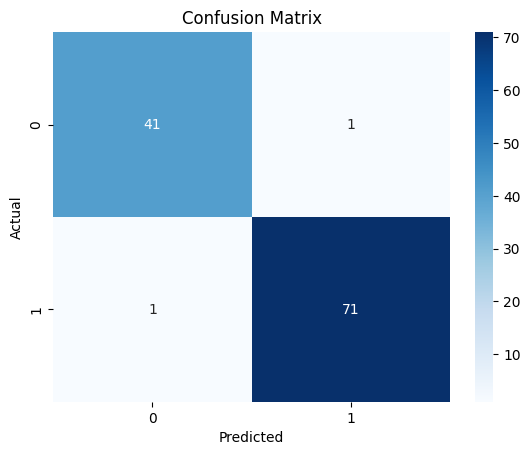

In [16]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
sample = X_test.iloc[0].values.reshape(1, -1)
prediction = model.predict(sample)

if prediction[0] == 1:
    print("Prediction: Benign (No Cancer)")
else:
    print("Prediction: Malignant (Cancer)")

Prediction: Malignant (Cancer)


C:\Users\monty\.conda\envs\ai\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
